In [2]:
import altair as alt
import pandas as pd

from altair import datum
import altair.vegalite.v3 as v3

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [88]:
df = pd.read_csv('https://raw.githubusercontent.com/kai-wren/UCU_DataViz/master/rate.csv')
df.head()

,region,year,rate
0,Crimea,1990,2.5
1,Vinnytsia,1990,-2.1
2,Volyn,1990,4.0
3,Dnipropetrovsk,1990,0.5
4,Donetsk,1990,-1.2


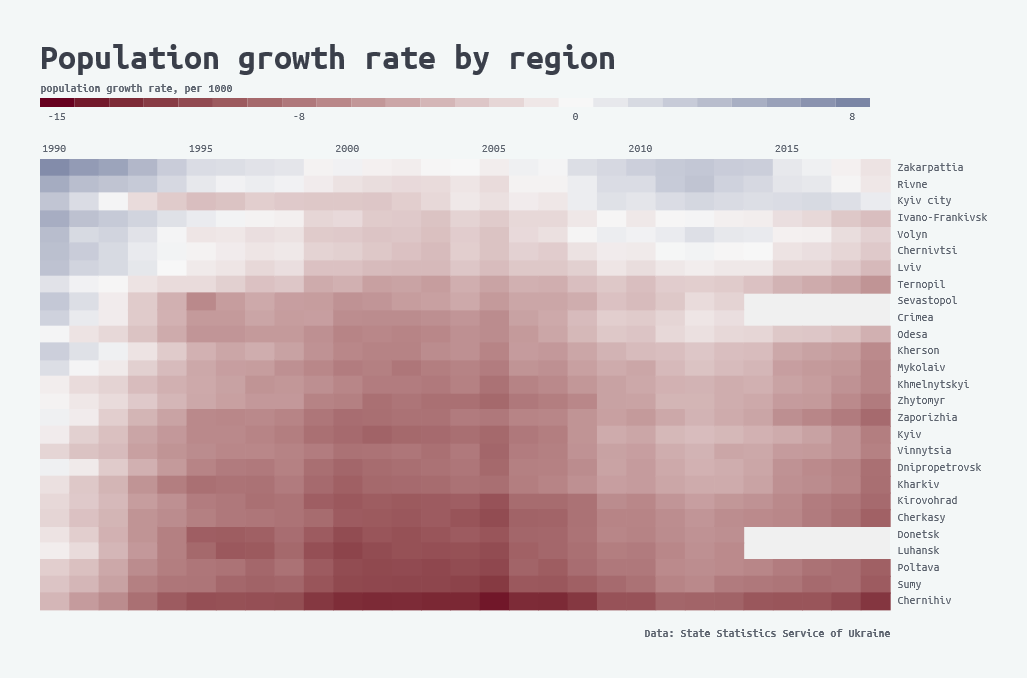

In [207]:
source = pd.DataFrame({
    'num': [-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
})

legend = alt.Chart(source).mark_rect().encode(
    x=alt.X('num:O', 
        axis=alt.Axis(values=[-15, -8, 0, 8], orient ='bottom', titleAnchor='start', titleY=-25, labelBaseline='top',
                     labelPadding=3),
        title='population growth rate, per 1000'),
    color=alt.Color('num:Q',
                    scale=alt.Scale(range=['#67001f', '#f7f7f7', '#053061'], domain=[-15, 0, 15]),
                   legend=None)
).properties(width=830, height=9, title='Population growth rate by region')

# background = alt.Chart(df).mark_rect().encode(
#     x=alt.X('year:O'),
#     y=alt.Y('region:O'),
#     color=alt.Color('rate:Q', scale=alt.Scale(range=['#f7f7f7'], domain=[0]) )
# ).properties(width=850, height=450)

heat_map = alt.Chart(df).mark_rect(width=30, height=18).encode(
    x=alt.X('year:O', 
            axis=alt.Axis(values=[1990, 1995, 2000, 2005, 2010, 2015], 
                          title='Data: State Statistics Service of Ukraine', 
                          titleY=480, titleAnchor='end') 
           ),
    y=alt.Y('region:O', sort=alt.EncodingSortField(field="rate", op="mean", order="descending"), axis=alt.Axis(title=None)),
    color=alt.Color('rate:Q', scale=alt.Scale(range=['#67001f', '#f7f7f7', '#053061'], domain=[-15, 0, 15], padding=0, 
                                             paddingInner=0, paddingOuter=0, ),
                    title='population growth rate per 1000', legend=None)
#     color=alt.Color('rate:Q', 
#                     bin=alt.BinParams(step=1),
#                     scale=alt.Scale(align=16/23, interpolate='lab', type='bin-ordinal'),
#                     legend=None,
#                     title='population growth rate per 1000')
).properties(width=850, height=450)


# legend = alt.Chart(df).mark_rect().encode(
# x=alt.X('year:O', axis=alt.Axis(values=[1990, 1995, 2000, 2005, 2010, 2015])),
# y=alt.Y('region:O', sort=alt.EncodingSortField(field="rate", op="mean", order="descending")),
# color=alt.Color('bin_rate:Q', 
#                 bin=alt.BinParams(binned=True), 
#                 scale=alt.Scale(range=['#67001f', '#f7f7f7', '#053061'], interpolate='lab', type='bin-ordinal')
#                                               )
# ).transform_filter(datum.rate!='null'
#                   ).transform_bin('bin_rate', 'rate', bin=alt.BinParams(step=1, steps=list(range(-15,9))))

# chart = alt.layer(
# #     background,
#     heat_map
# ).resolve_axis(
# x='independent',
# y='independent'
# ).resolve_scale(
# color='independent')



alt.vconcat(
    legend,
    heat_map
).configure( background='#F3F7F7', padding=40, 
            title=alt.TitleConfig(anchor='start', color='#3A3F4A', fontSize=36, font='Ubuntu Mono', fontWeight=900)
).configure_axisY(orient='right', ticks=False, labelFont='Ubuntu Mono', labelFontSize=12, labelColor='#5D646F',
                  labelPadding=7, domain=False
).configure_axisX(orient='top', labelAngle = 0, labelFont='Ubuntu Mono', labelFontSize=12, labelColor='#5D646F',
                  labelPadding=17, ticks=False, titleColor='#5D646F', titleFont='Ubuntu Mono', titleFontSize=12,
                  domain=False, grid=False
# ).configure_legend(orient='top', gradientLength=830, gradientThickness=10, labelFont='Ubuntu Mono', labelColor='#5D646F',
#                    labelFontSize=12, titleColor='#5D646F', titleFont='Ubuntu Mono', titleFontSize=12, titleLimit=500 
).configure_view(stroke=None, fill=alt.Value('#f0f0f0')
)
# .resolve_axis(
#     x='independent'
# )
# 



# legend.configure_legend(orient='top', gradientLength=830, gradientThickness=10, labelFont='Ubuntu Mono', 
#                         labelColor='#5D646F', labelFontSize=12, titleColor='#5D646F', titleFont='Ubuntu Mono', 
#                         titleFontSize=12, titleLimit=500 
# ).properties(width=850, height=450, title='Population growth rate by region')



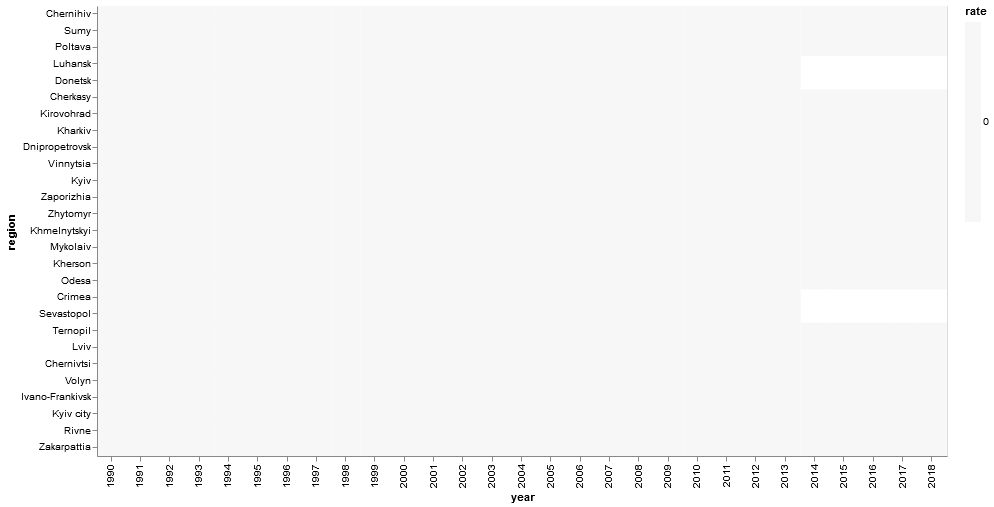

In [114]:
background = alt.Chart(df).mark_rect().encode(
    x=alt.X('year:O'),
    y=alt.Y('region:O', sort=alt.EncodingSortField(field="rate", op="mean", order="ascending")),
    color=alt.Color('rate:Q', scale=alt.Scale(range=['#f7f7f7'], domain=[0]) )
).properties(width=850, height=450)

background